In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EGDI

In [2]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
egdi = egdi.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

EGOV

In [4]:
egov = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Participation Index',
    var_name='Metric',
    value_name='EPART'
)

In [5]:
egov = egov.iloc[:, [0, 2]]

LIST

In [6]:
countries = egdi['Country Name'].tolist()

PIB PER CAPITA PPC

In [7]:
pib = pd.read_csv('updated_wb_gdp_percapita_ppc.csv')

In [8]:
pib = pib.melt(
    id_vars='Country Name',
    value_vars='2024',
    var_name='Ano',
    value_name='PIB'
)

In [9]:
pib = pib[pib['Country Name'].isin(countries)]

In [10]:
pib = pib.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [11]:
pib = pib.fillna(0.0)

In [12]:
pib = pib.iloc[:, [0, 2]]

DISPERSÃO

In [13]:
epart_pib = egov.copy()

In [14]:
epart_pib['Produto Interno Bruto'] = pib['PIB']

In [15]:
epart_pib = epart_pib.rename(columns={'EPART': 'E-Participation Index'})

In [16]:
epart_pib = epart_pib.iloc[:, [1, 2]]

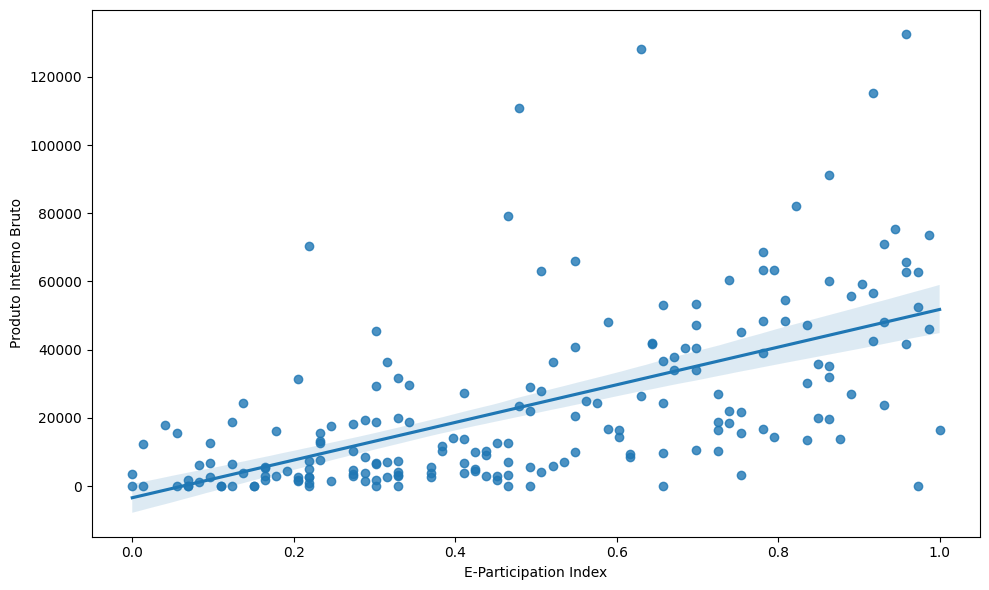

In [17]:
plt.figure(figsize=(10, 6))

sns.regplot(data=epart_pib, x='E-Participation Index', y='Produto Interno Bruto')

plt.tight_layout()
plt.show()